<h1 align= "center"> <strong> EDA - Adults Income </strong> </h1>
<center>---------------------------- </center>

# Table of Contents
* [1. About Dataset](#1.-About-Dataset)
* [2. Data Wrangling](#2.-Data-Wrangling)
* [3. Exploratory Data Analysis](#3.-Exploratory-Data-Analysis)
	* [3.1 Univariate Analysis](#3.1-Univariate-Analysis)
	* [3.2. Bivariate Analysis](#3.2-Bivariate-Analysis)
	* [3.3 Multivariate Analysis](#3.3-Multivariate-Analysis)
  

# 1. About Dataset

from the **`adult.names`** file,

* **`age`**: continuous.
* **`workclass`**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* **`fnlwgt`**: continuous.
* **`education`**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* **`education-num`**: continuous.
* **`marital-status`**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* **`occupation`**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, * * Priv-house-serv, Protective-serv, Armed-Forces.
* **`relationship`**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* **`race`**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* **`sex`**: Female, Male.
* **`capital-gain`**: continuous.
* **`capital-loss`**: continuous.
* **`hours-per-week`**: continuous.
* **`native-country`**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* **`income`** : >50K, <=50K.


In that file also, it is mentioned that full dataset has 48842 instances(line 8). Therefore, initially combined **adult.data.csv** and **adult.test.csv** to get the full dataset. 

# 2. Data Wrangling

In [6]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income']

In [8]:
#load the first dataset
df1 = pd.read_csv("adult.data.csv", names=column_names, header=None, na_values='?')

In [9]:
df1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
df1.shape

(32561, 15)

In [11]:
#load the second dataset
df2 = pd.read_csv("adult.test.csv", names=column_names, header=None)

In [12]:
df2.shape

(16282, 15)

In [13]:
df2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


In [14]:
# Drop first row 
df2 = df2.iloc[1: , :]
df2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


In [15]:
df2.shape

(16281, 15)

In [16]:
#combining the both datasets
df = pd.concat([df1, df2], ignore_index=True)

In [17]:
#shape of the dataset
df.shape

(48842, 15)

In [18]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [19]:
#checking the null value count
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

According to the above output, we can see there are no missing values in the dataset. But considering some variables, we can see there are few missing values, Python can't recognize.

In [20]:
df['workclass'].value_counts()

 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 ?                    2799
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: workclass, dtype: int64

We can see Python can't recognize " ?" values as missing values. So we will replace those values as "Other".

In [21]:
for col in ['workclass', 'occupation', 'native-country']:
    df[col] = np.where(df[col]==" ?", "Other", df[col])

In [22]:
df['occupation'].value_counts()

 Prof-specialty       6172
 Craft-repair         6112
 Exec-managerial      6086
 Adm-clerical         5611
 Sales                5504
 Other-service        4923
 Machine-op-inspct    3022
Other                 2809
 Transport-moving     2355
 Handlers-cleaners    2072
 Farming-fishing      1490
 Tech-support         1446
 Protective-serv       983
 Priv-house-serv       242
 Armed-Forces           15
Name: occupation, dtype: int64

Now we have a clean dataset.

In [23]:
## Chanage the datatype of the age variable
df['age']=df['age'].astype(float)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48842 non-null  float64
 1   workclass       48842 non-null  object 
 2   fnlwgt          48842 non-null  float64
 3   education       48842 non-null  object 
 4   education-num   48842 non-null  float64
 5   marital-status  48842 non-null  object 
 6   occupation      48842 non-null  object 
 7   relationship    48842 non-null  object 
 8   race            48842 non-null  object 
 9   sex             48842 non-null  object 
 10  capital-gain    48842 non-null  float64
 11  capital-loss    48842 non-null  float64
 12  hours-per-week  48842 non-null  float64
 13  native-country  48842 non-null  object 
 14  income          48842 non-null  object 
dtypes: float64(6), object(9)
memory usage: 5.6+ MB


To see the numerical statistics of the continuous variables.

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [26]:
df['income'].value_counts()

 <=50K     24720
 <=50K.    12435
 >50K       7841
 >50K.      3846
Name: income, dtype: int64

We need to clean the dependent variable by removing the **` . `** from each category.

In [27]:
df['income'] = df['income'].str.split('.').str[0]

In [28]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


Now the dataset is clean and good to proceed.

# 3. Exploratory Data Analysis

## 3.1 Univariate Analysis

### 3.1.1 Categorical Features

##### Age : Dependent Variable

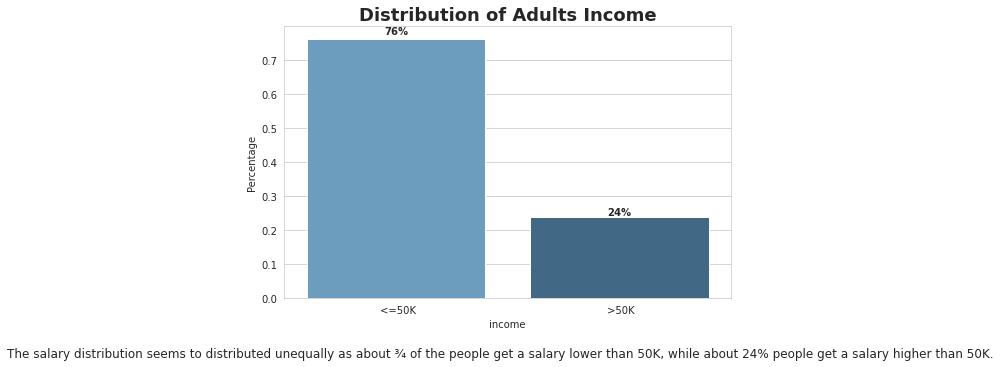

In [29]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Distribution of Adults Income', fontsize=18, fontweight='bold')

title_string = 'The salary distribution seems to distributed unequally as about ¾ of the people get a salary lower than 50K, while about 24% people get a salary higher than 50K.'
plt.suptitle(title_string, y=-0.01, fontsize=12)
eda_percentage = df['income'].value_counts(normalize = True).rename_axis('income').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'income', y = 'Percentage', data = eda_percentage.head(10), palette='Blues_d')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

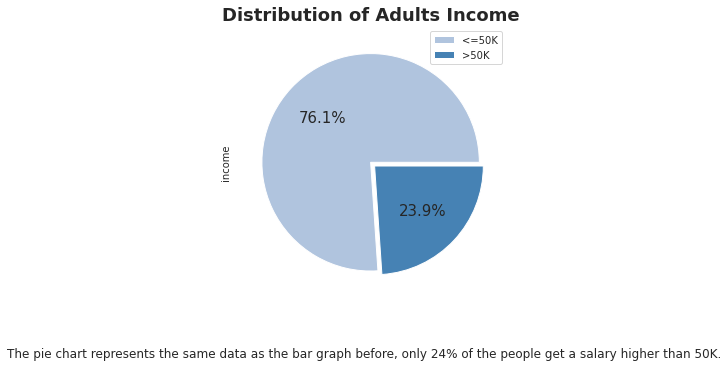

In [30]:
plt.figure(figsize=(7,5))

df['income'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['lightsteelblue','steelblue'], explode = [0,0.05], textprops = {"fontsize":15})
plt.title('Distribution of Adults Income', fontsize=18, fontweight='bold')
title_string='The pie chart represents the same data as the bar graph before, only 24% of the people get a salary higher than 50K.'
plt.suptitle(title_string, y=-0.01, fontsize=12)
plt.legend(labels=['<=50K', '>50K'])
plt.show()

##### workclass

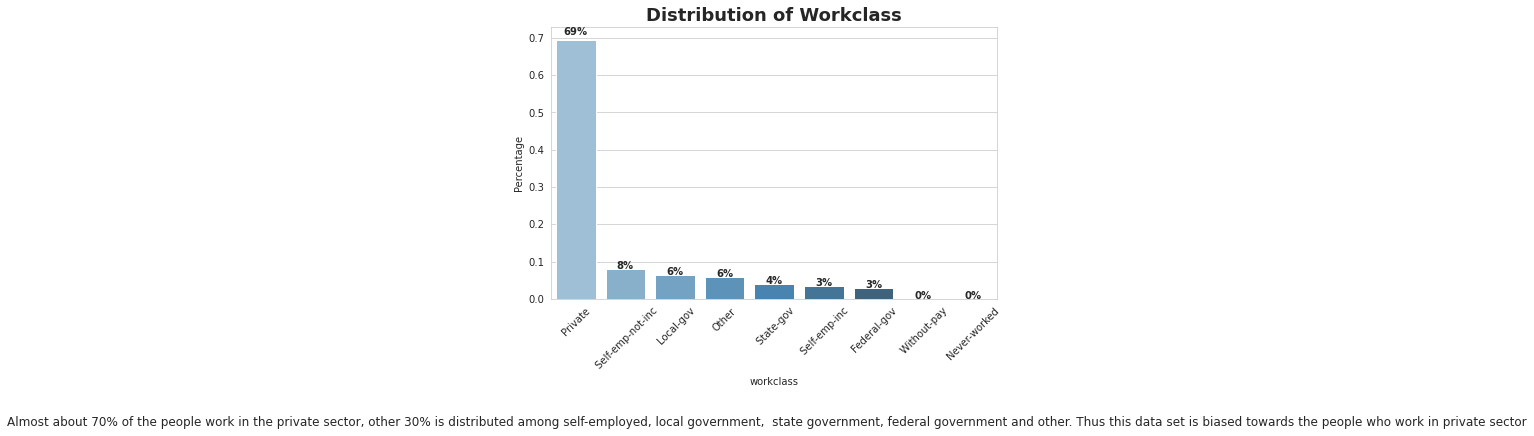

In [31]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Distribution of Workclass', fontsize=18, fontweight='bold')
title_string='Almost about 70% of the people work in the private sector, other 30% is distributed among self-employed, local government,  state government, federal government and other. Thus this data set is biased towards the people who work in private sector'
plt.suptitle(title_string, y=-0.2, fontsize=12)
eda_percentage = df['workclass'].value_counts(normalize = True).rename_axis('workclass').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'workclass', y = 'Percentage', data = eda_percentage.head(10), palette='Blues_d')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
    plt.setp(ax.get_xticklabels(), rotation=45);

##### education

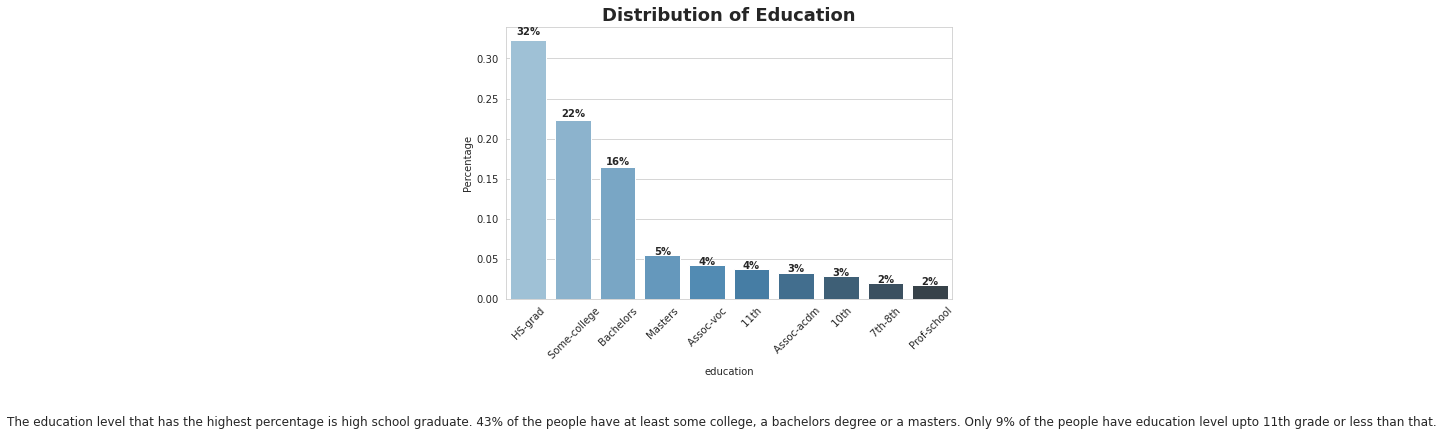

In [32]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Distribution of Education', fontsize=18, fontweight='bold')
title_string='The education level that has the highest percentage is high school graduate. 43% of the people have at least some college, a bachelors degree or a masters. Only 9% of the people have education level upto 11th grade or less than that.'
plt.suptitle(title_string, y=-0.2, fontsize=12)
eda_percentage = df['education'].value_counts(normalize = True).rename_axis('education').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'education', y = 'Percentage', data = eda_percentage.head(10), palette='Blues_d')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
    plt.setp(ax.get_xticklabels(), rotation=45);

##### marital-status

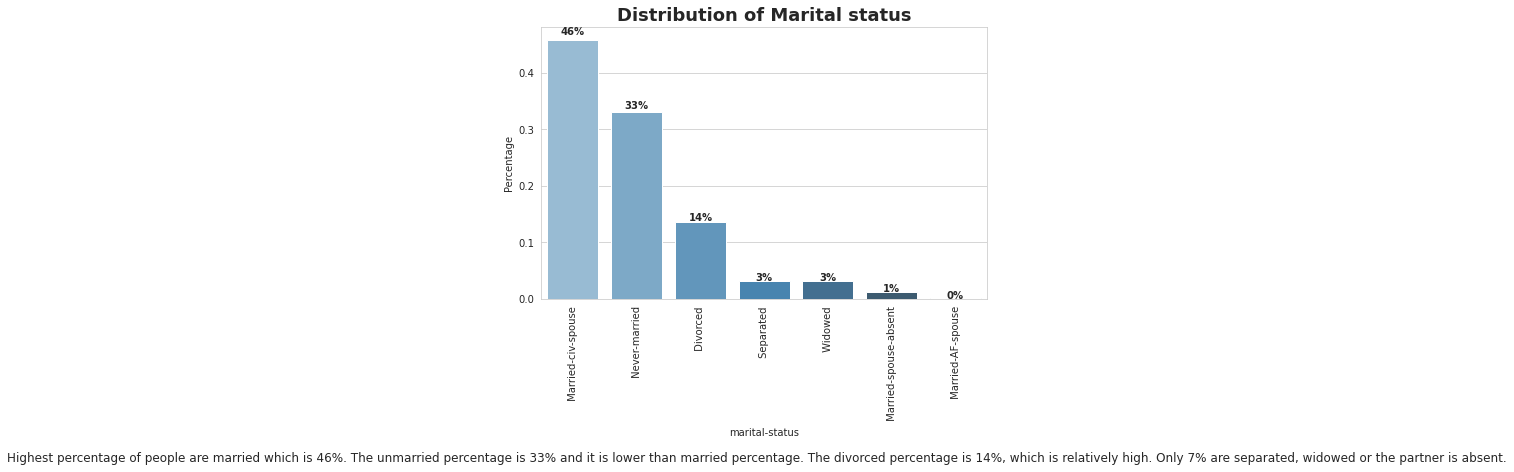

In [33]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Distribution of Marital status', fontsize=18, fontweight='bold')
title_string='Highest percentage of people are married which is 46%. The unmarried percentage is 33% and it is lower than married percentage. The divorced percentage is 14%, which is relatively high. Only 7% are separated, widowed or the partner is absent.'
plt.suptitle(title_string, y=-0.3, fontsize=12)
eda_percentage = df['marital-status'].value_counts(normalize = True).rename_axis('marital-status').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'marital-status', y = 'Percentage', data = eda_percentage.head(10), palette='Blues_d')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
    plt.setp(ax.get_xticklabels(), rotation=90);

##### sex

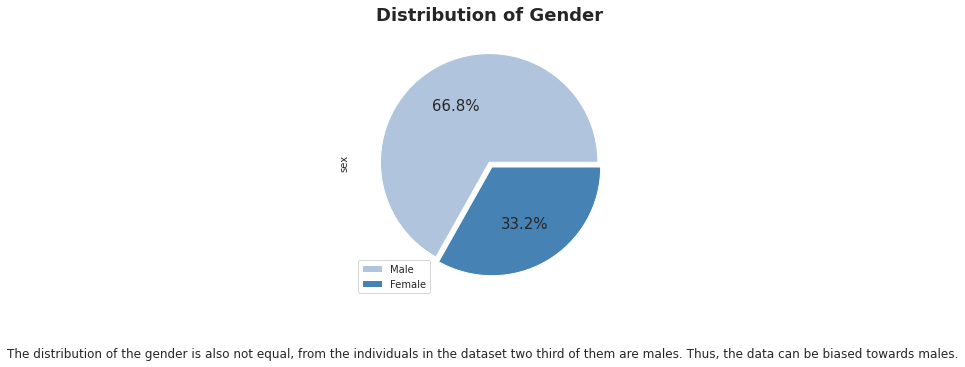

In [34]:
plt.figure(figsize=(7,5))

df['sex'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['lightsteelblue','steelblue'], explode = [0,0.05], textprops = {"fontsize":15})
plt.title('Distribution of Gender', fontsize=18, fontweight='bold')
title_string='The distribution of the gender is also not equal, from the individuals in the dataset two third of them are males. Thus, the data can be biased towards males.'
plt.suptitle(title_string, y=-0.01, fontsize=12)
plt.legend(labels=['Male', 'Female'])
plt.show()

##### occupation

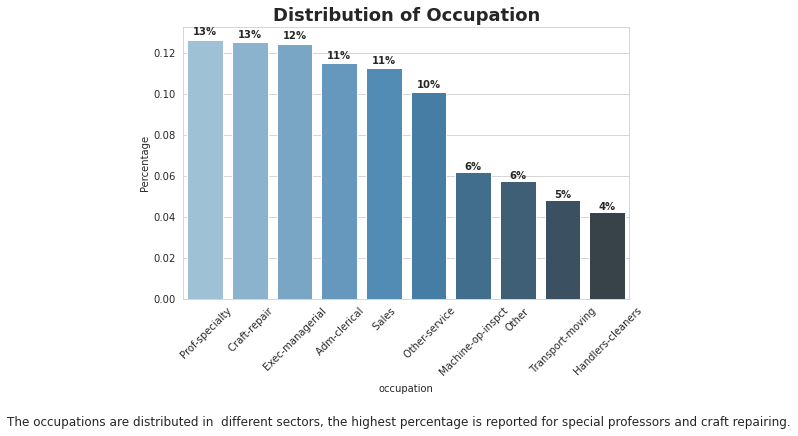

In [35]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Distribution of Occupation', fontsize=18, fontweight='bold')
title_string='The occupations are distributed in  different sectors, the highest percentage is reported for special professors and craft repairing.'
plt.suptitle(title_string, y=-0.2, fontsize=12)
eda_percentage = df['occupation'].value_counts(normalize = True).rename_axis('occupation').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'occupation', y = 'Percentage', data = eda_percentage.head(10), palette='Blues_d')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
    plt.setp(ax.get_xticklabels(), rotation=45);

##### race

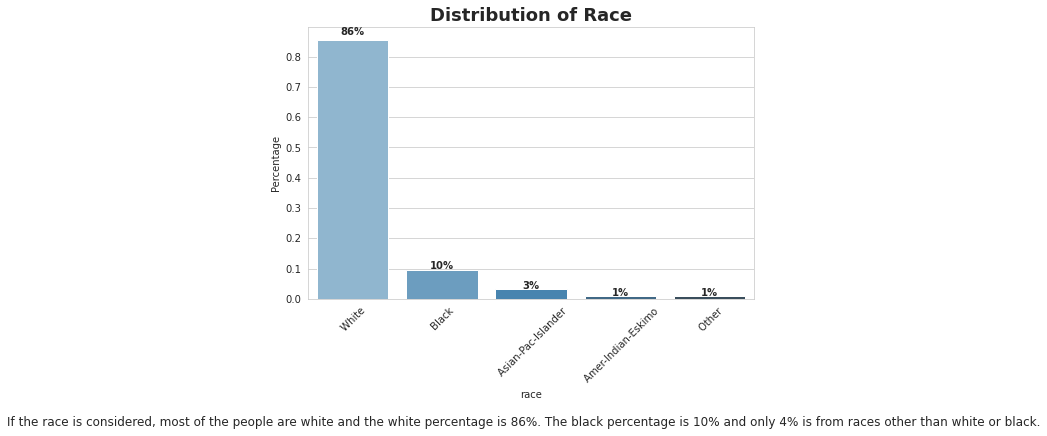

In [36]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Distribution of Race', fontsize=18, fontweight='bold')
title_string='If the race is considered, most of the people are white and the white percentage is 86%. The black percentage is 10% and only 4% is from races other than white or black.'
plt.suptitle(title_string, y=-0.2, fontsize=12)
eda_percentage = df['race'].value_counts(normalize = True).rename_axis('race').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'race', y = 'Percentage', data = eda_percentage.head(10), palette='Blues_d')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
    plt.setp(ax.get_xticklabels(), rotation=45);

##### native-country

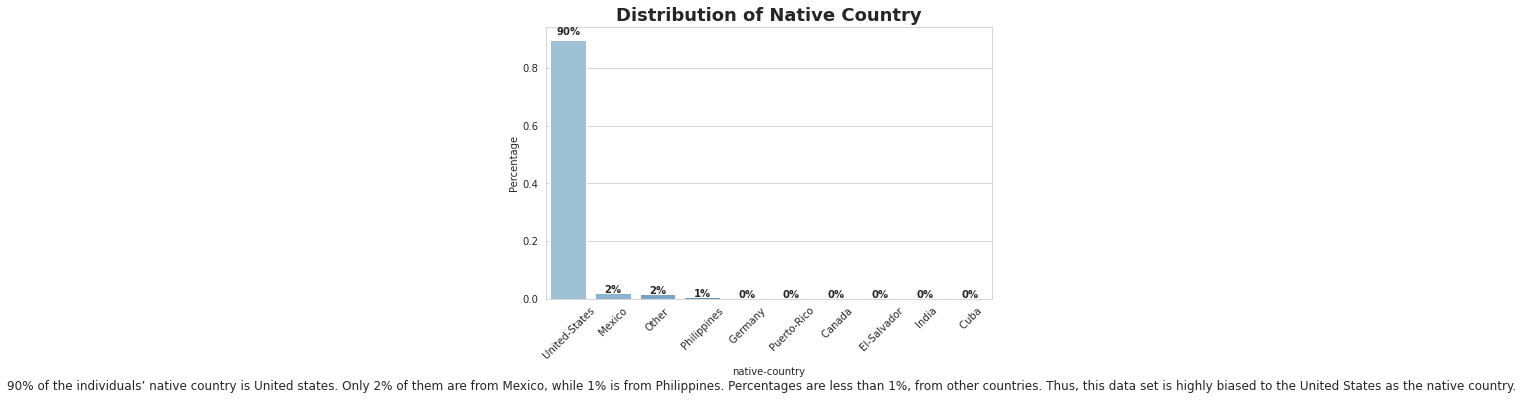

In [37]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Distribution of Native Country', fontsize=18, fontweight='bold')
title_string='90% of the individuals’ native country is United states. Only 2% of them are from Mexico, while 1% is from Philippines. Percentages are less than 1%, from other countries. Thus, this data set is highly biased to the United States as the native country.'
plt.suptitle(title_string, y=-0.1, fontsize=12)
eda_percentage = df['native-country'].value_counts(normalize = True).rename_axis('native-country').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'native-country', y = 'Percentage', data = eda_percentage.head(10), palette='Blues_d')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
    plt.setp(ax.get_xticklabels(), rotation=45);

### 3.1.2 Continuous Features

In [38]:
variables = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

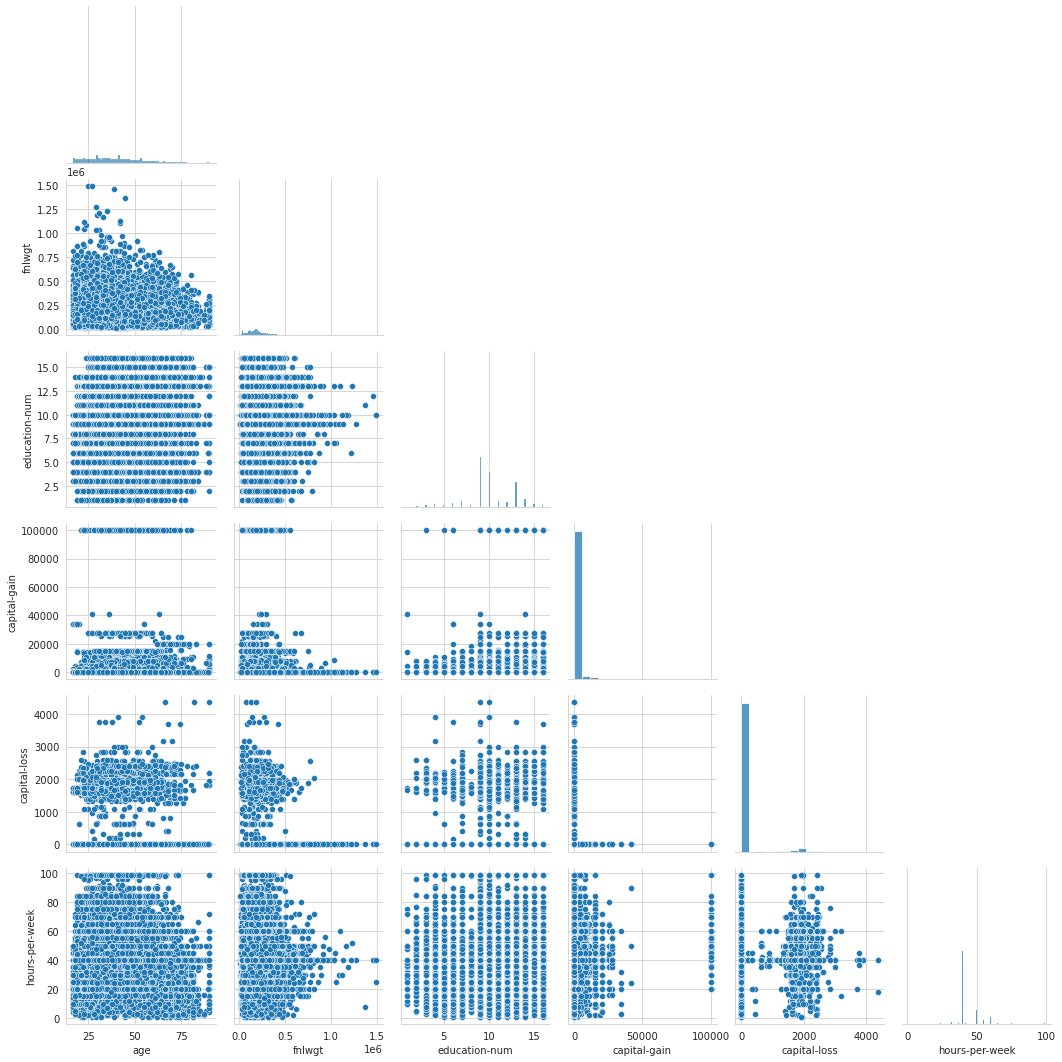

In [39]:
sns.pairplot(df, corner=True)

In [40]:
import matplotlib

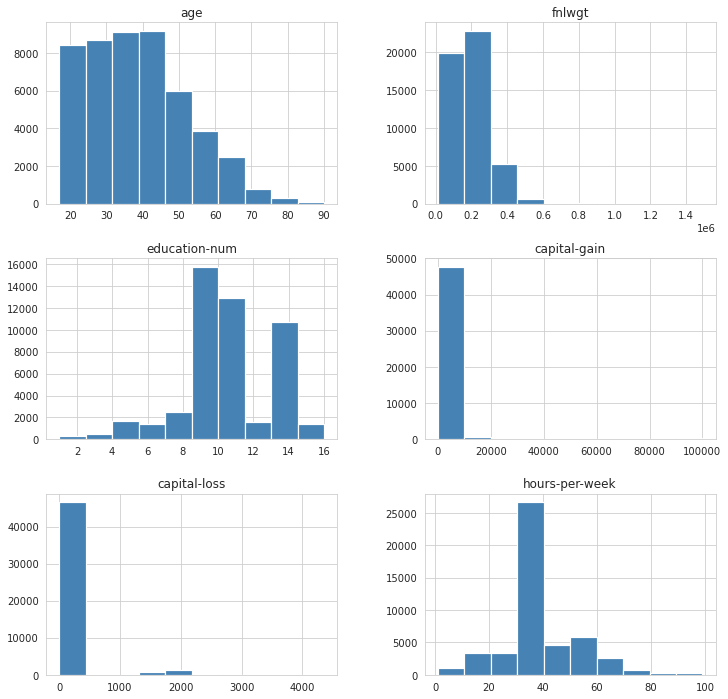

In [41]:
# Distribution of Different Features of the Dataset
distribution = df.hist( linewidth = 1.2, color = 'steelblue')
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

##### age

The maximum age is 90.0
The minimum age is 17.0


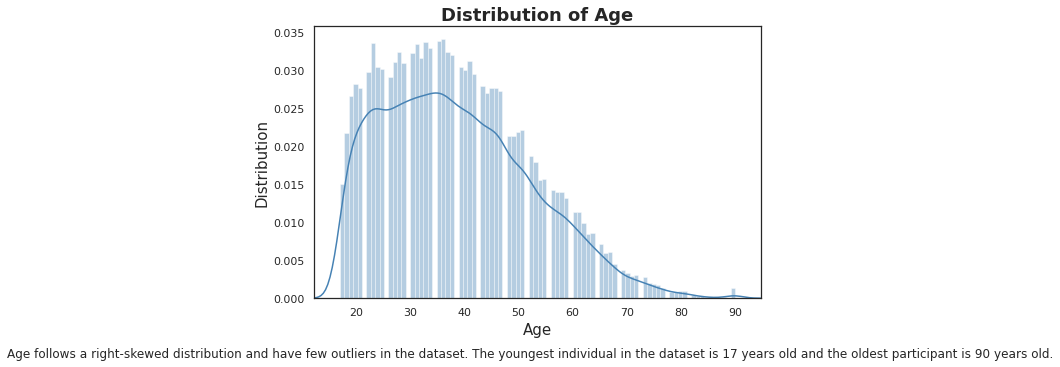

In [42]:
# This distribution plot shows the distribution of Age of people across the Data Set
plt.rcParams['figure.figsize'] = [8, 5]
sns.set(style = 'white')
plt.title('Distribution of Age', fontsize=18, fontweight='bold')
sns.distplot(df['age'], color = "steelblue", bins = 90, )
plt.ylabel("Distribution", fontsize = 15)
plt.xlabel("Age", fontsize = 15)
title_string = 'Age follows a right-skewed distribution and have few outliers in the dataset. The youngest individual in the dataset is 17 years old and the oldest participant is 90 years old.'
plt.suptitle(title_string, y=-0.01, fontsize=12)
plt.margins(x = 0)

print ("The maximum age is", df['age'].max())
print ("The minimum age is", df['age'].min())

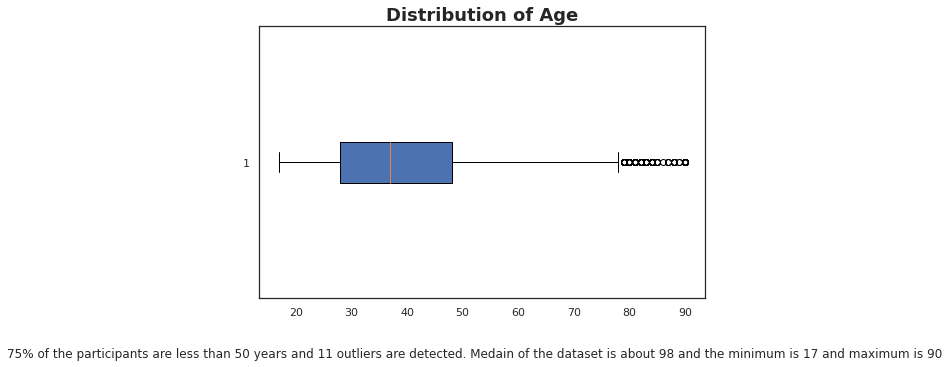

In [43]:
fig = plt.figure(figsize =(8, 5))
# Creating plot
plt.boxplot(df['age'], 
            vert = 0,
            patch_artist=True
           )
plt.title('Distribution of Age', fontsize=18, fontweight='bold')
title_string = '75% of the participants are less than 50 years and 11 outliers are detected. Medain of the dataset is about 98 and the minimum is 17 and maximum is 90'
plt.suptitle(title_string, y=-0.01, fontsize=12)
plt.show()

In [44]:
df_temp = df.copy()

In [45]:
df_temp['age_bin'] = pd.cut(df_temp['age']
                             ,bins = [0,30,60,90]
                             ,labels=['Young:0-30', 'Mid:30-60', 'Old:60+'])

In [46]:
df_temp['age_bin'].value_counts()

Mid:30-60     29443
Young:0-30    15793
Old:60+        3606
Name: age_bin, dtype: int64

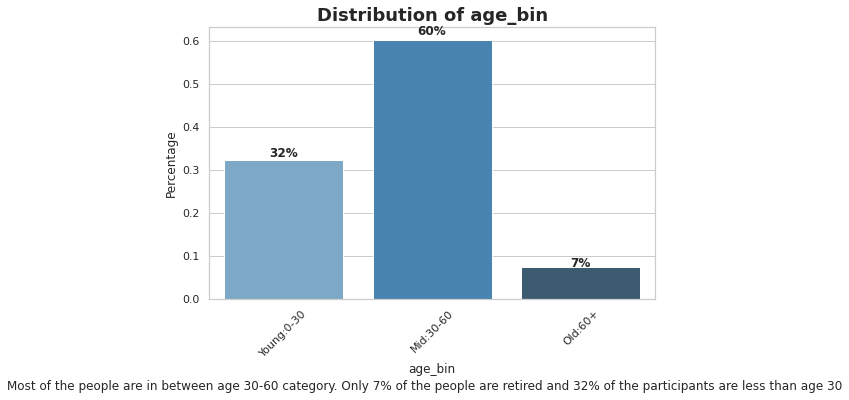

In [47]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Distribution of age_bin', fontsize=18, fontweight='bold')
title_string = 'Most of the people are in between age 30-60 category. Only 7% of the people are retired and 32% of the participants are less than age 30'
plt.suptitle(title_string, y=-0.1, fontsize=12)
eda_percentage = df_temp['age_bin'].value_counts(normalize = True).rename_axis('age_bin').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'age_bin', y = 'Percentage', data = eda_percentage.head(10), palette='Blues_d')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
    plt.setp(ax.get_xticklabels(), rotation=45);

##### fnlwgt

The maximum age is 1490400.0
The minimum age is 12285.0


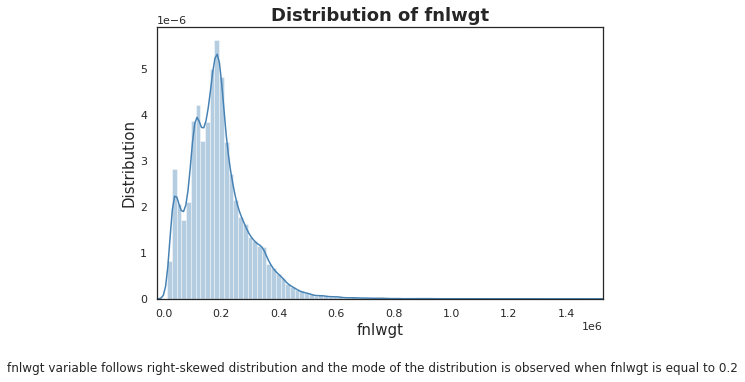

In [48]:
# This distribution plot shows the distribution of Age of people across the Data Set
plt.rcParams['figure.figsize'] = [8, 5]
sns.set(style = 'white')
sns.distplot(df['fnlwgt'], color = "steelblue", bins = 90, )
plt.title('Distribution of fnlwgt', fontsize=18, fontweight='bold')
title_string = 'fnlwgt variable follows right-skewed distribution and the mode of the distribution is observed when fnlwgt is equal to 0.2'
plt.suptitle(title_string, y=-0.05, fontsize=12)
plt.ylabel("Distribution", fontsize = 15)
plt.xlabel("fnlwgt", fontsize = 15)
plt.margins(x = 0)

print ("The maximum age is", df['fnlwgt'].max())
print ("The minimum age is", df['fnlwgt'].min())

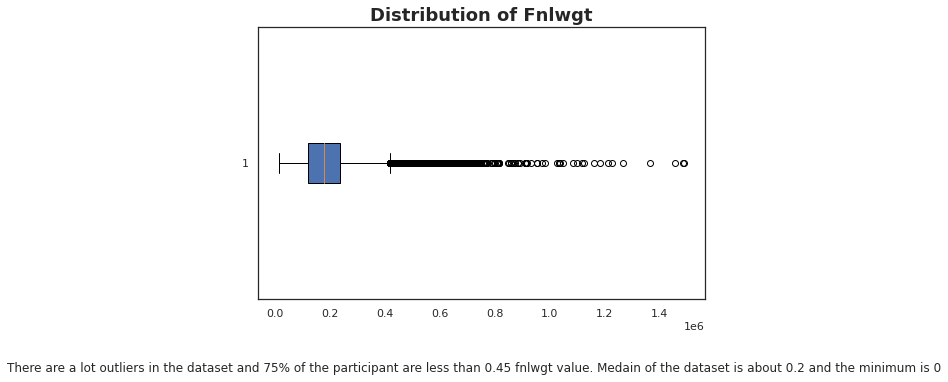

In [49]:
fig = plt.figure(figsize =(8, 5))
# Creating plot
plt.boxplot(df['fnlwgt'], 
            vert = 0,
            patch_artist=True
           )
plt.title('Distribution of Fnlwgt', fontsize=18, fontweight='bold')
title_string = 'There are a lot outliers in the dataset and 75% of the participant are less than 0.45 fnlwgt value. Medain of the dataset is about 0.2 and the minimum is 0'
plt.suptitle(title_string, y=-0.05, fontsize=12)
plt.show()

The maximum age is 16.0
The minimum age is 1.0


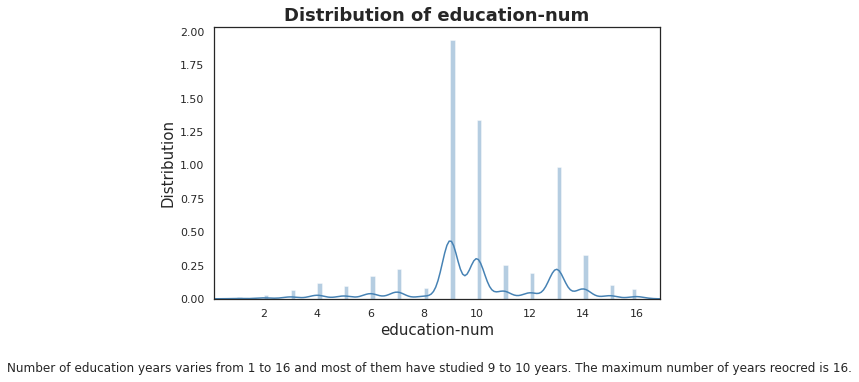

In [50]:
# This distribution plot shows the distribution of Age of people across the Data Set
plt.rcParams['figure.figsize'] = [8, 5]
plt.title('Distribution of education-num', fontsize=18, fontweight='bold')
title_string = 'Number of education years varies from 1 to 16 and most of them have studied 9 to 10 years. The maximum number of years reocred is 16.'
plt.suptitle(title_string, y=-0.05, fontsize=12)
sns.set(style = 'white')
sns.distplot(df['education-num'], color = "steelblue", bins = 90, )
plt.ylabel("Distribution", fontsize = 15)
plt.xlabel("education-num", fontsize = 15)
plt.margins(x = 0)

print ("The maximum age is", df['education-num'].max())
print ("The minimum age is", df['education-num'].min())

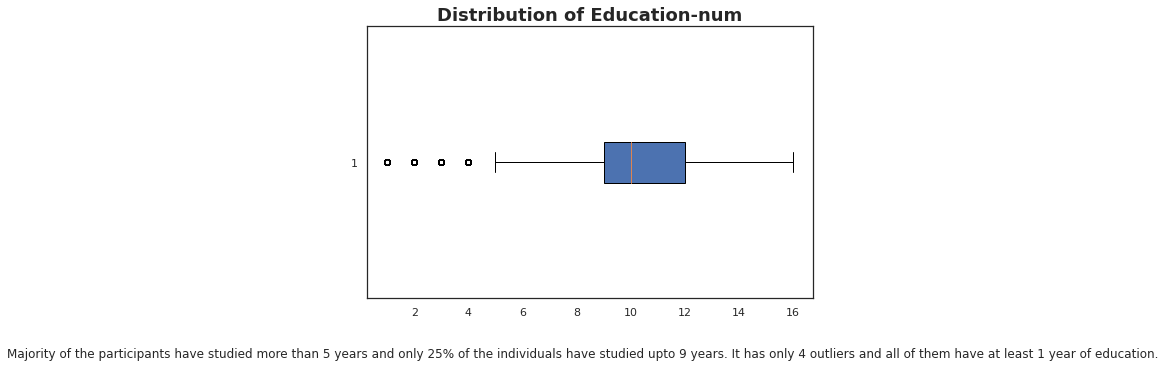

In [51]:
fig = plt.figure(figsize =(8, 5))
# Creating plot
plt.boxplot(df['education-num'], 
            vert = 0,
            patch_artist=True
           )
plt.title('Distribution of Education-num', fontsize=18, fontweight='bold')
title_string = 'Majority of the participants have studied more than 5 years and only 25% of the individuals have studied upto 9 years. It has only 4 outliers and all of them have at least 1 year of education.'
plt.suptitle(title_string, y=-0.01, fontsize=12)
plt.show()

##### capital-gain

The maximum age is 99999.0
The minimum age is 0.0


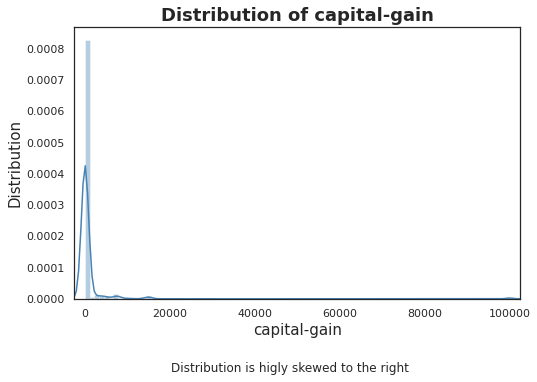

In [52]:
# This distribution plot shows the distribution of Age of people across the Data Set
plt.rcParams['figure.figsize'] = [8, 5]
sns.set(style = 'white')
plt.title('Distribution of capital-gain', fontsize=18, fontweight='bold')
title_string = 'Distribution is higly skewed to the right'
plt.suptitle(title_string, y=-0.05, fontsize=12)
sns.distplot(df['capital-gain'], color = "steelblue", bins = 90, )
plt.ylabel("Distribution", fontsize = 15)
plt.xlabel("capital-gain", fontsize = 15)
plt.margins(x = 0)

print ("The maximum age is", df['capital-gain'].max())
print ("The minimum age is", df['capital-gain'].min())

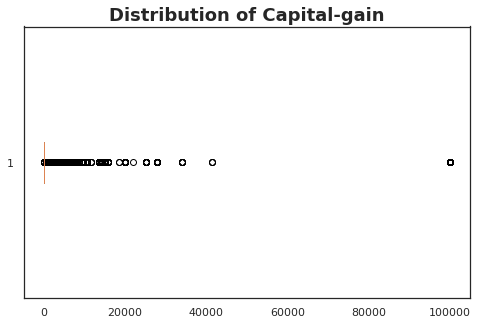

In [53]:
fig = plt.figure(figsize =(8, 5))
# Creating plot
plt.boxplot(df['capital-gain'], 
            vert = 0,
            patch_artist=True
           )
plt.title('Distribution of Capital-gain', fontsize=18, fontweight='bold')
plt.show()

In [54]:
df_temp = df.copy()

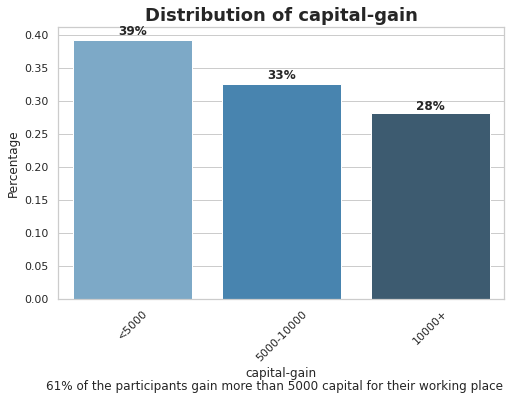

In [55]:
df_temp['capital-gain'] = pd.cut(df_temp['capital-gain'], bins = [0, 5000, 10000, 100000]
                                 , labels = ['<5000', '5000-10000', '10000+']
                                )

sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Distribution of capital-gain', fontsize=18, fontweight='bold')
title_string = '61% of the participants gain more than 5000 capital for their working place'
plt.suptitle(title_string, y=-0.1, fontsize=12)
eda_percentage = df_temp['capital-gain'].value_counts(normalize = True).rename_axis('capital-gain').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'capital-gain', y = 'Percentage', data = eda_percentage.head(10), palette='Blues_d')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
    plt.setp(ax.get_xticklabels(), rotation=45);

##### capital-loss

The maximum age is 4356.0
The minimum age is 0.0


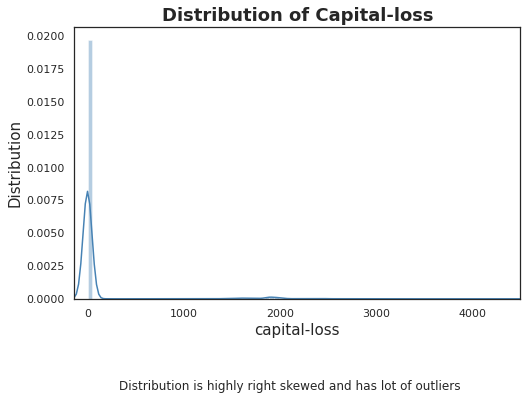

In [56]:
# This distribution plot shows the distribution of Age of people across the Data Set
plt.rcParams['figure.figsize'] = [8, 5]
sns.set(style = 'white')
plt.title('Distribution of Capital-loss', fontsize=18, fontweight='bold')
title_string = 'Distribution is highly right skewed and has lot of outliers'
plt.suptitle(title_string, y=-0.1, fontsize=12)
sns.distplot(df['capital-loss'], color = "steelblue", bins = 90, )
plt.ylabel("Distribution", fontsize = 15)
plt.xlabel("capital-loss", fontsize = 15)
plt.margins(x = 0)

print ("The maximum age is", df['capital-loss'].max())
print ("The minimum age is", df['capital-loss'].min())

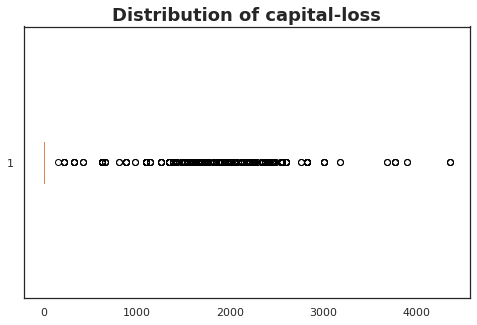

In [57]:
fig = plt.figure(figsize =(8, 5))
# Creating plot
plt.boxplot(df['capital-loss'], 
            vert = 0,
            patch_artist=True
           )
plt.title('Distribution of capital-loss', fontsize=18, fontweight='bold')
plt.show()

##### hours-per-week

The maximum age is 99.0
The minimum age is 1.0


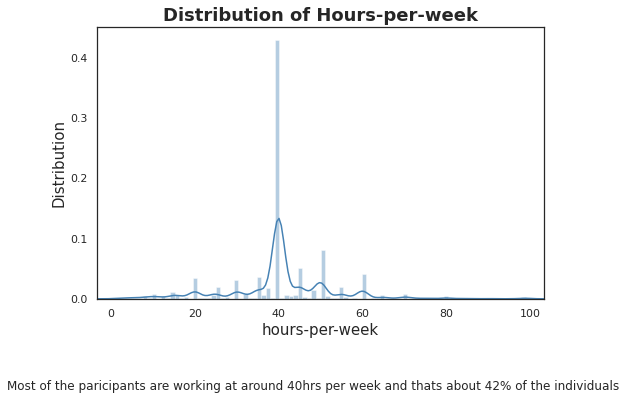

In [58]:
# This distribution plot shows the distribution of Age of people across the Data Set
plt.rcParams['figure.figsize'] = [8, 5]
sns.set(style = 'white')
plt.title('Distribution of Hours-per-week', fontsize=18, fontweight='bold')
title_string = 'Most of the paricipants are working at around 40hrs per week and thats about 42% of the individuals'  
plt.suptitle(title_string, y=-0.1, fontsize=12)
sns.distplot(df['hours-per-week'], color = "steelblue", bins = 90, )
plt.ylabel("Distribution", fontsize = 15)
plt.xlabel("hours-per-week", fontsize = 15)
plt.margins(x = 0)

print ("The maximum age is", df['hours-per-week'].max())
print ("The minimum age is", df['hours-per-week'].min())

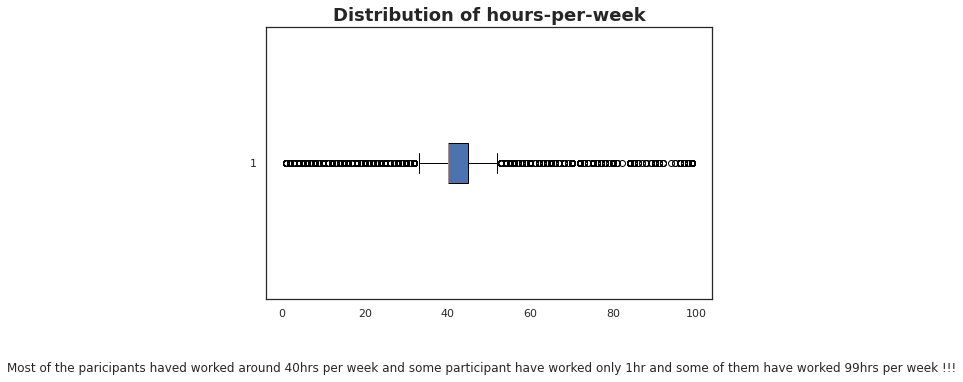

In [59]:
fig = plt.figure(figsize =(8, 5))
# Creating plot
plt.boxplot(df['hours-per-week'], 
            vert = 0,
            patch_artist=True
           )
plt.title('Distribution of hours-per-week', fontsize=18, fontweight='bold')
title_string = 'Most of the paricipants haved worked around 40hrs per week and some participant have worked only 1hr and some of them have worked 99hrs per week !!!'
plt.suptitle(title_string, y=-0.05, fontsize=12)
plt.show()

## 3.2. Bivariate Analysis

### 3.2.1 Categorical Independent Variables Vs Dependent Variable

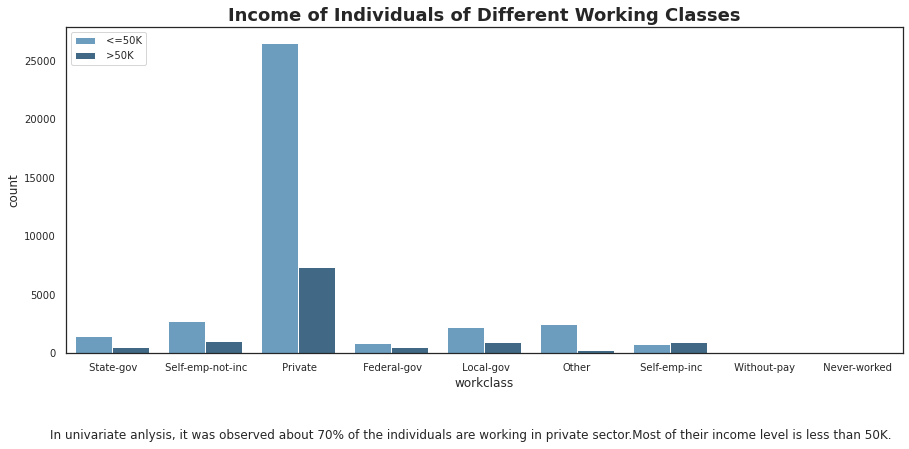

In [60]:
plt.figure(figsize=(15,6))
sns.countplot(df['workclass'], hue = df['income'], palette='Blues_d')
plt.title('Income of Individuals of Different Working Classes', fontsize=18, fontweight='bold')
title_string = 'In univariate anlysis, it was observed about 70% of the individuals are working in private sector.Most of their income level is less than 50K.'
plt.suptitle(title_string, y=-0.05, fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.show()

In [61]:
df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

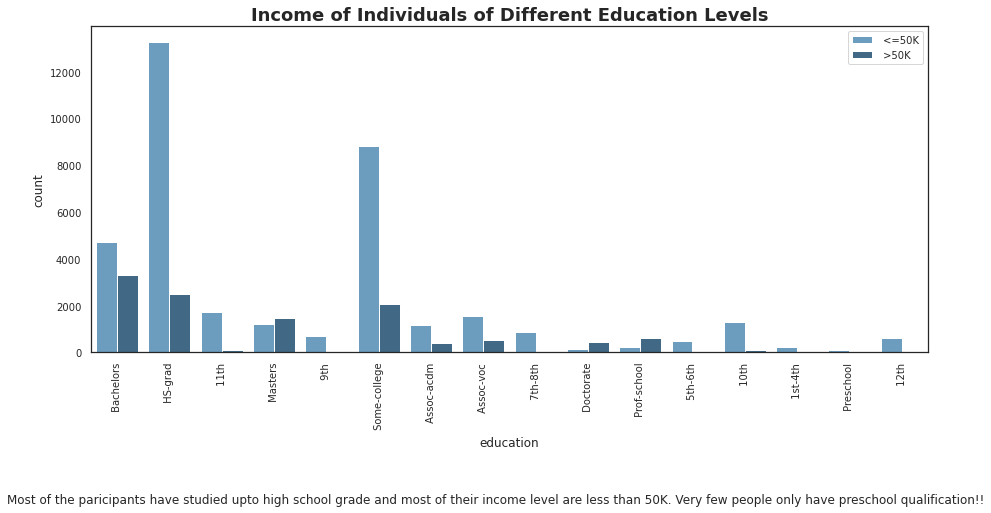

In [62]:
plt.figure(figsize=(15,6))
order_list = [' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th']
sns.countplot(df['education'], hue = df['income'], palette='Blues_d', order= order_list)
plt.title('Income of Individuals of Different Education Levels', fontsize=18, fontweight='bold')
title_string = 'Most of the paricipants have studied upto high school grade and most of their income level are less than 50K. Very few people only have preschool qualification!!'
plt.suptitle(title_string, y=-0.2, fontsize=12)
plt.xticks(fontsize=10,rotation = 90)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.show()

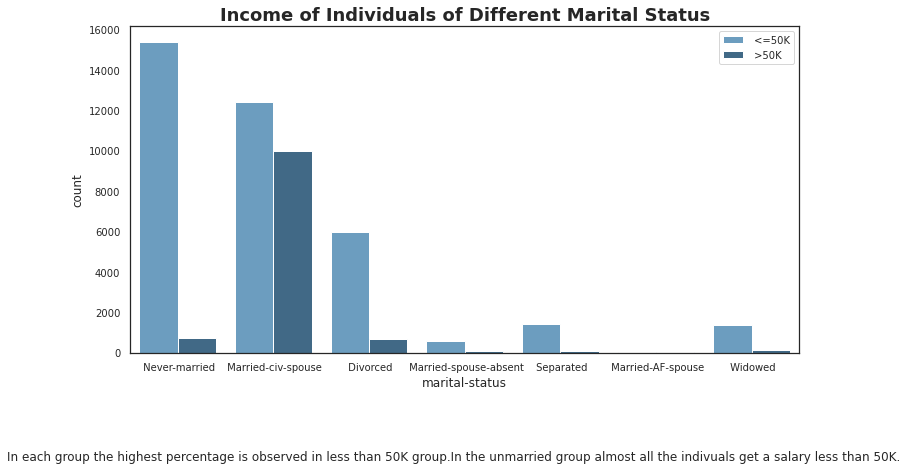

In [63]:
plt.figure(figsize=(12,6))
sns.countplot(df['marital-status'], hue = df['income'], palette='Blues_d')
plt.title('Income of Individuals of Different Marital Status', fontsize=18, fontweight='bold')
title_string = 'In each group the highest percentage is observed in less than 50K group.In the unmarried group almost all the indivuals get a salary less than 50K.'
plt.suptitle(title_string, y=-0.1, fontsize=12)
plt.xticks(fontsize=10,rotation = 0)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.show()

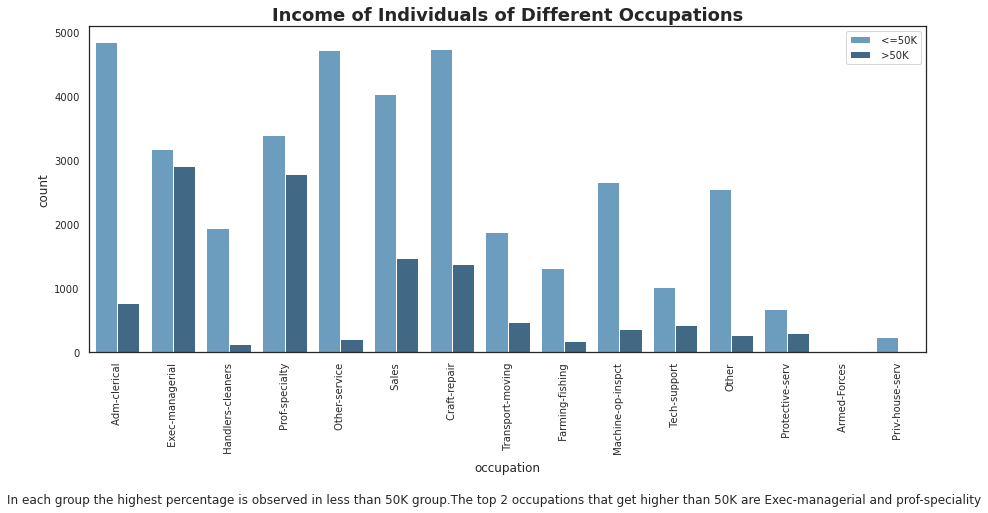

In [64]:
plt.figure(figsize=(15,6))
sns.countplot(df['occupation'], hue = df['income'], palette='Blues_d')
plt.title('Income of Individuals of Different Occupations', fontsize=18, fontweight='bold')
title_string = 'In each group the highest percentage is observed in less than 50K group.The top 2 occupations that get higher than 50K are Exec-managerial and prof-speciality'
plt.suptitle(title_string, y=-0.2, fontsize=12)
plt.xticks(fontsize=10,rotation = 90)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.show()

In [65]:
col = sns.color_palette("Blues", as_cmap=True)

In [66]:
pip install cmocean

Note: you may need to restart the kernel to use updated packages.


In [67]:
import seaborn as sns
import cmocean

cpal = sns.color_palette("Blues_d")

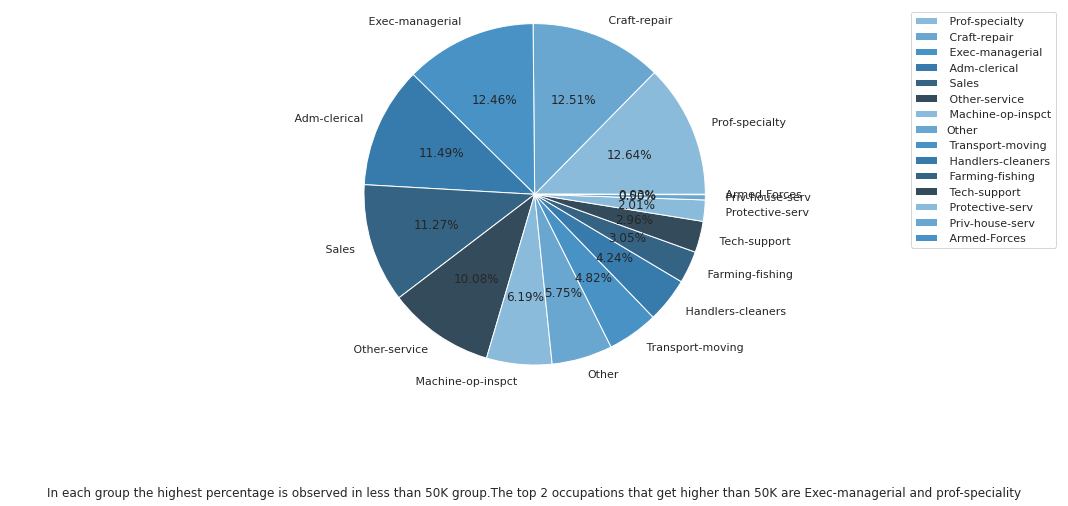

In [68]:
#the workclasses whose income is higher than 50K 
df_ = df.loc[df['income'] == '>50K',['occupation']]
workclass_types = df['occupation'].value_counts()
labels = list(workclass_types.index)
aggregate = list(workclass_types)
plt.figure(figsize=(15,6))

plt.suptitle(title_string, y=-0.2, fontsize=12)

plt.pie(aggregate, labels = labels, autopct='%1.2f%%',colors = cpal)
plt.legend(labels, loc = 'best')
plt.axis('equal')
plt.tight_layout()
plt.show()

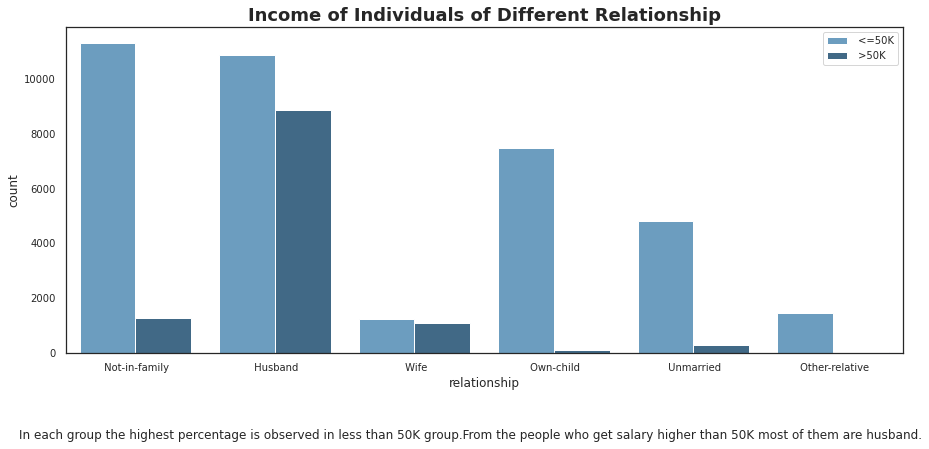

In [69]:
plt.figure(figsize=(15,6))
sns.countplot(df['relationship'], hue = df['income'], palette='Blues_d')
plt.title('Income of Individuals of Different Relationship', fontsize=18, fontweight='bold')
title_string = 'In each group the highest percentage is observed in less than 50K group.From the people who get salary higher than 50K most of them are husband.'
plt.suptitle(title_string, y=-0.05, fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.show()

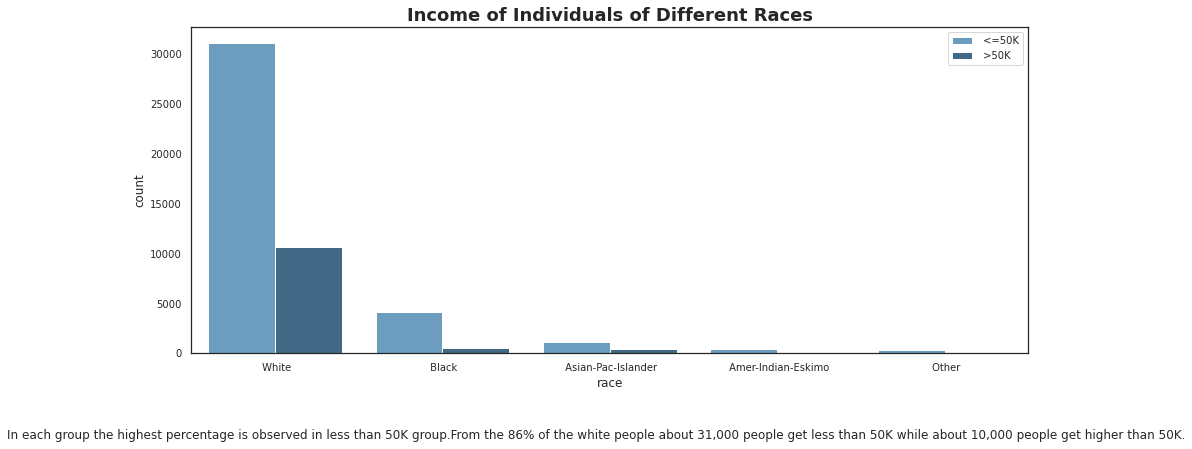

In [70]:
plt.figure(figsize=(15,6))
sns.countplot(df['race'], hue = df['income'], palette='Blues_d')
plt.title('Income of Individuals of Different Races', fontsize=18, fontweight='bold')
title_string = 'In each group the highest percentage is observed in less than 50K group.From the 86% of the white people about 31,000 people get less than 50K while about 10,000 people get higher than 50K.'
plt.suptitle(title_string, y=-0.05, fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.show()

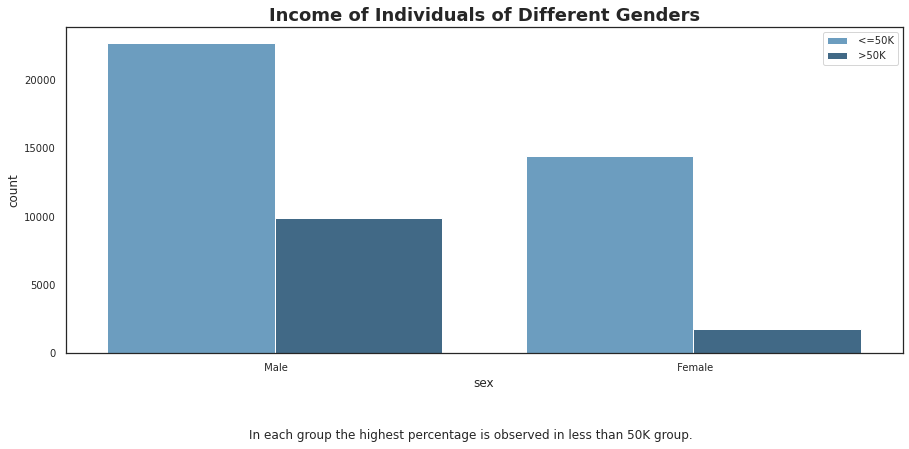

In [71]:
plt.figure(figsize=(15,6))
sns.countplot(df['sex'], hue = df['income'], palette='Blues_d')
plt.title('Income of Individuals of Different Genders', fontsize=18, fontweight='bold')
title_string = 'In each group the highest percentage is observed in less than 50K group.'
plt.suptitle(title_string, y=-0.05, fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.show()

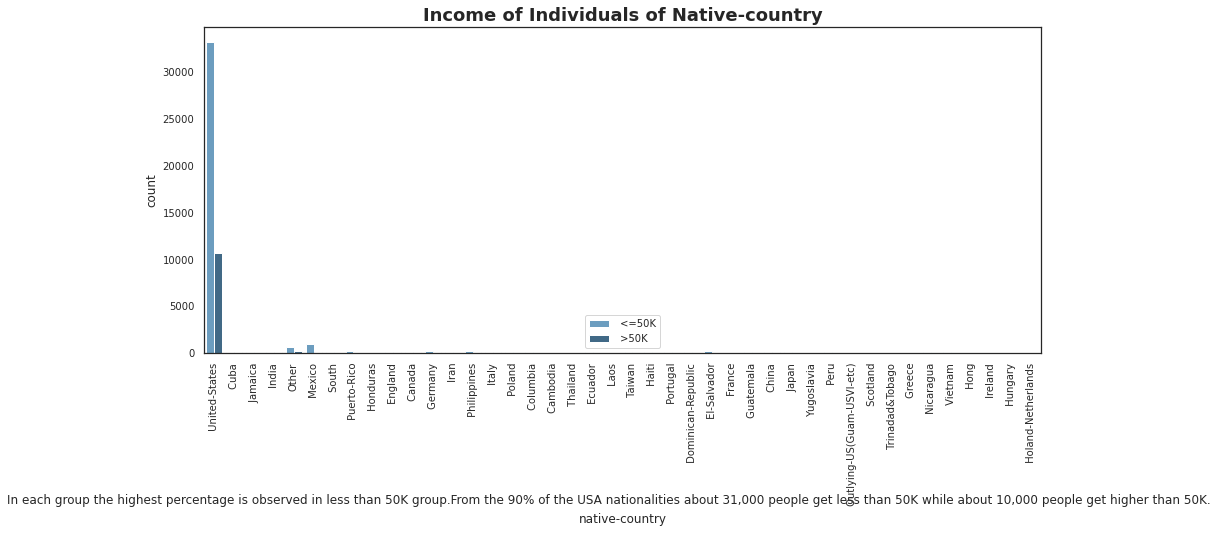

In [72]:
plt.figure(figsize=(15,6))
sns.countplot(df['native-country'], hue = df['income'], palette='Blues_d')
plt.title('Income of Individuals of Native-country', fontsize=18, fontweight='bold')
title_string = 'In each group the highest percentage is observed in less than 50K group.From the 90% of the USA nationalities about 31,000 people get less than 50K while about 10,000 people get higher than 50K.'
plt.suptitle(title_string, y=-0.2, fontsize=12)
plt.xticks(fontsize=10,rotation = 90)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.show()

In [73]:
df['native-country-new'] = np.where(df['native-country']==' United-States', df['native-country'], "Others")

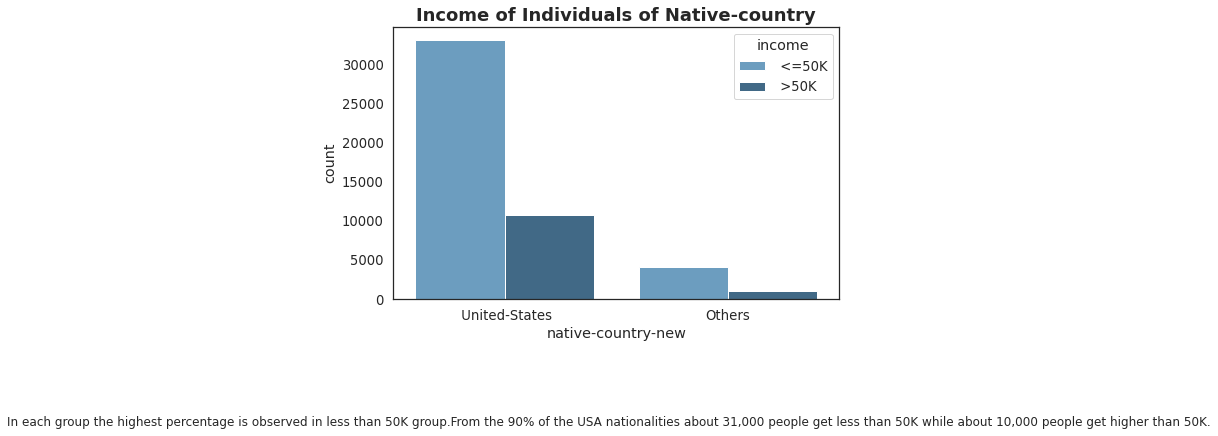

In [76]:
sns.countplot(x = 'native-country-new', hue = 'income', data = df, palette='Blues_d')
plt.title('Income of Individuals of Native-country', fontsize=18, fontweight='bold')
title_string = 'In each group the highest percentage is observed in less than 50K group.From the 90% of the USA nationalities about 31,000 people get less than 50K while about 10,000 people get higher than 50K.'
plt.suptitle(title_string, y=-0.2, fontsize=12)
plt.show()

### 3.2.2 Continuous Independent Variables Vs Dependent Variable

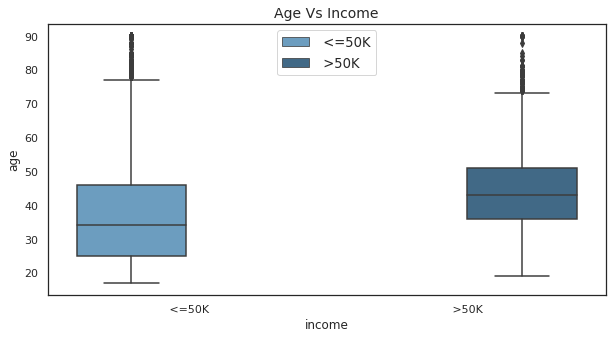

In [75]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10,5))
sns.set_context('notebook', font_scale=1.2)
s = sns.boxplot(ax = ax1, x="income", y="age", hue="income",data=df, palette="Blues_d",showfliers=True)
plt.title('Distribution of Income with Age', fontsize=18, fontweight='bold')
plt.legend(loc='upper center')
plt.title('Age Vs Income', size=14)
plt.show()

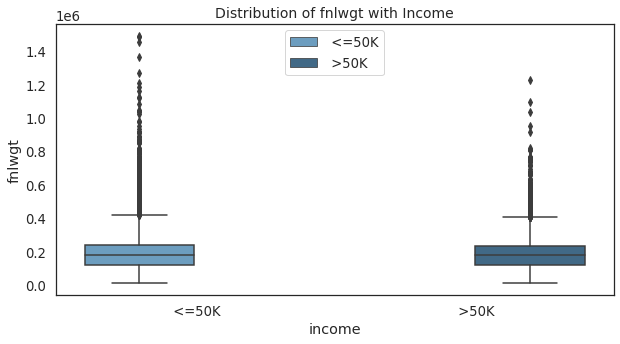

In [77]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10,5))
sns.set_context('notebook', font_scale=1.2)
s = sns.boxplot(ax = ax1, x="income", y="fnlwgt", hue="income",data=df, palette="Blues_d",showfliers=True)
plt.legend(loc='upper center')
plt.title('Distribution of fnlwgt with Income', size=14)
plt.show()

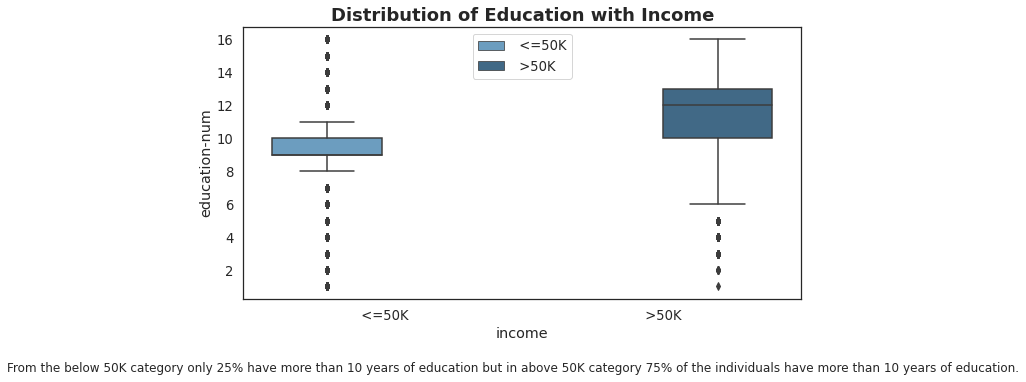

In [79]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10,5))
sns.set_context('notebook', font_scale=1.2)
s = sns.boxplot(ax = ax1, x="income", y="education-num", hue="income",data=df, palette="Blues_d",showfliers=True)
plt.legend(loc='upper center')
plt.title('Distribution of Education with Income', fontsize=18, fontweight='bold')
title_string = 'From the below 50K category only 25% have more than 10 years of education but in above 50K category 75% of the individuals have more than 10 years of education.'
plt.suptitle(title_string, y=-0.05, fontsize=12)
plt.show()

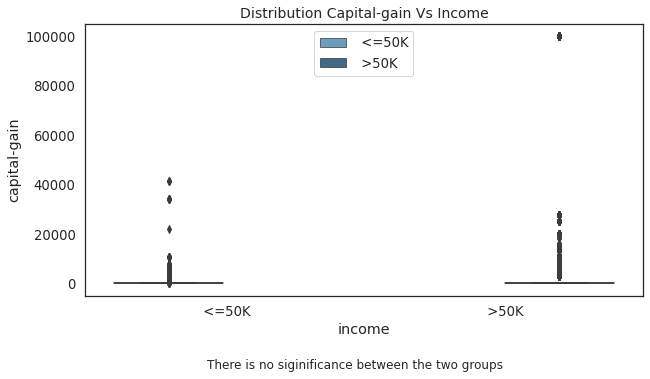

In [82]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10,5))
sns.set_context('notebook', font_scale=1.2)
s = sns.boxplot(ax = ax1, x="income", y="capital-gain", hue="income",data=df, palette="Blues_d",showfliers=True)
plt.legend(loc='upper center')
plt.title('Distribution Capital-gain Vs Income', size=14)
title_string = 'There is no siginificance between the two groups'
plt.suptitle(title_string, y=-0.05, fontsize=12)
plt.show()

In [83]:
df_temp = df.copy()

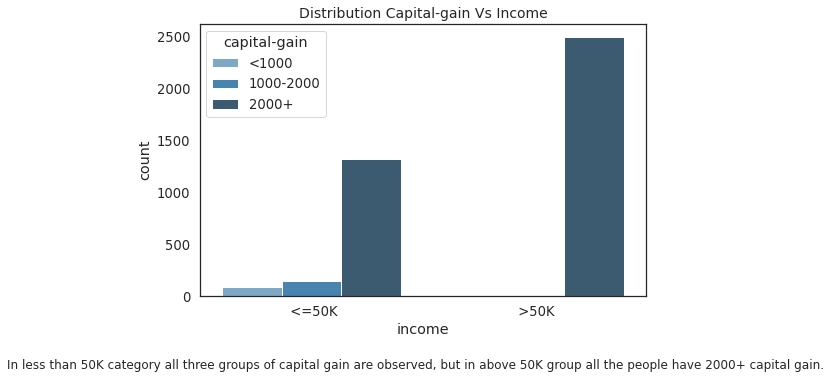

In [84]:
df_temp['capital-gain'] = pd.cut(df_temp['capital-gain'], bins = [0, 1000, 2000, 100000]
                                 , labels = ['<1000', '1000-2000', '2000+']
                                )

sns.countplot(x = 'income', hue = 'capital-gain', data = df_temp, palette='Blues_d')
plt.title('Distribution Capital-gain Vs Income', size=14)
title_string = 'In less than 50K category all three groups of capital gain are observed, but in above 50K group all the people have 2000+ capital gain.'
plt.suptitle(title_string, y=-0.05, fontsize=12)
plt.show()

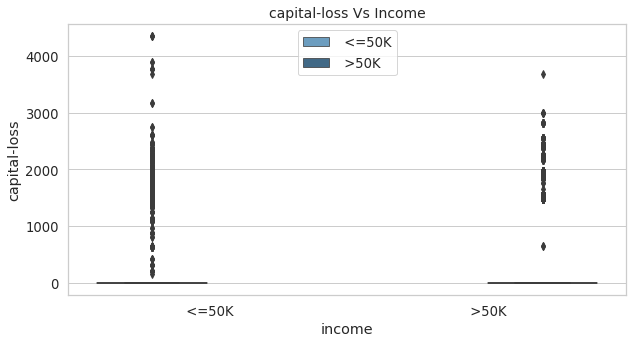

In [245]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10,5))
sns.set_context('notebook', font_scale=1.2)
s = sns.boxplot(ax = ax1, x="income", y="capital-loss", hue="income",data=df, palette="Blues_d",showfliers=True)
plt.legend(loc='upper center')
plt.title('capital-loss Vs Income', size=14)
plt.show()

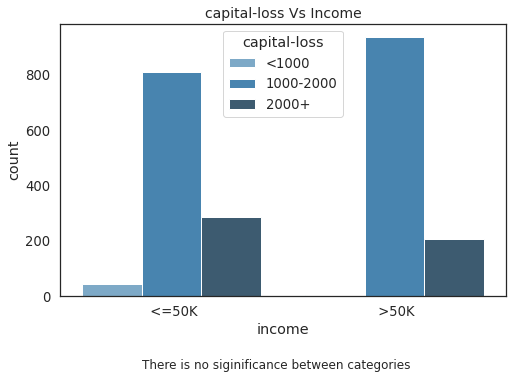

In [94]:
df_temp['capital-loss'] = pd.cut(df_temp['capital-loss'], bins = [0, 1000, 2000, 100000]
                                 , labels = ['<1000', '1000-2000', '2000+']
                                )
plt.title('capital-loss Vs Income', size=14)
title_string = 'There is no siginificance between categories'
plt.suptitle(title_string, y=-0.05, fontsize=12)
sns.countplot(x = 'income', hue = 'capital-loss', data = df_temp, palette='Blues_d')
plt.show()

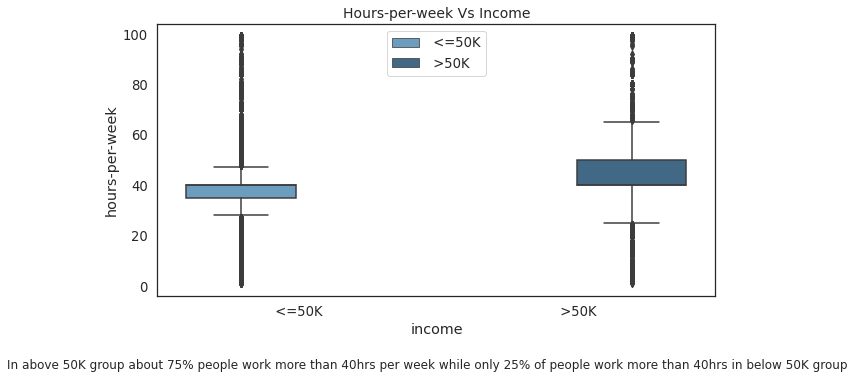

In [85]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10,5))
sns.set_context('notebook', font_scale=1.2)
s = sns.boxplot(ax = ax1, x="income", y="hours-per-week", hue="income",data=df, palette="Blues_d",showfliers=True)
plt.legend(loc='upper center')
plt.title('Hours-per-week Vs Income', size=14)
title_string = 'In above 50K group about 75% people work more than 40hrs per week while only 25% of people work more than 40hrs in below 50K group'
plt.suptitle(title_string, y=-0.05, fontsize=12)
plt.show()

## 3.3 Multivariate Analysis

In [87]:
def boxplot_variation(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sns.boxplot(ax = ax1, x=feature1, y=feature2, hue=feature3,
                data=df, palette="Blues_d",showfliers=False)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show();

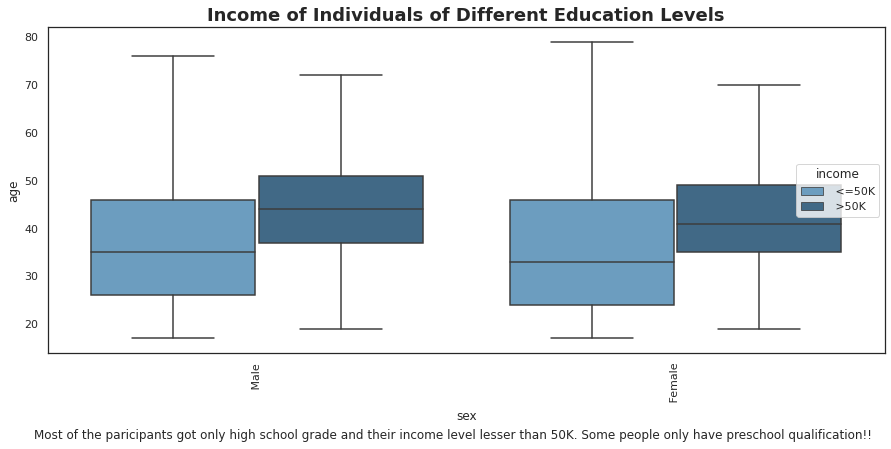

In [350]:
boxplot_variation('sex','age', 'income',15)

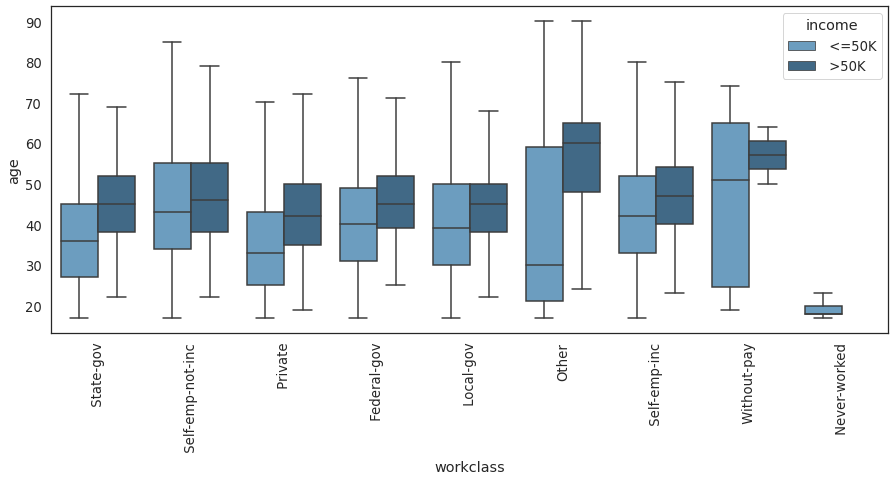

In [89]:
boxplot_variation('workclass','age', 'income',15)

In the boxplot very few people are observed younger than 25 years that do not do a job but get a salary less tha 50K.

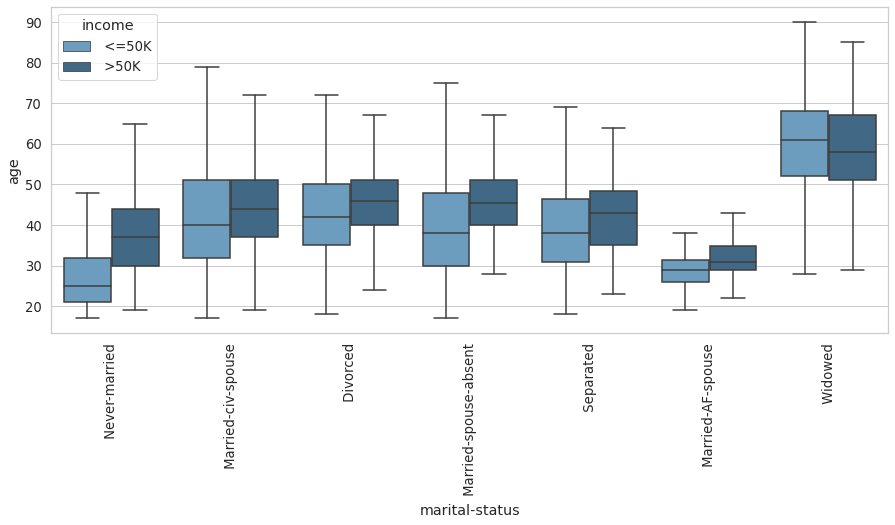

In [254]:
boxplot_variation('marital-status','age', 'income',15)

The variation is highest in the Widowed group. 75% of both salary categories the indiviuals are older than 50 years.

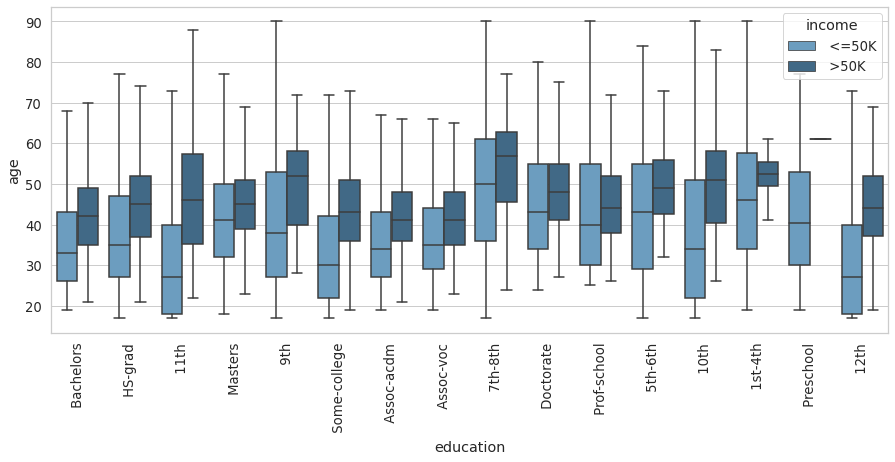

In [255]:
boxplot_variation('education','age', 'income',15)

There's an unusal observation is noticed that the person has education upto pre school level but he gets a salary higher than 50K.

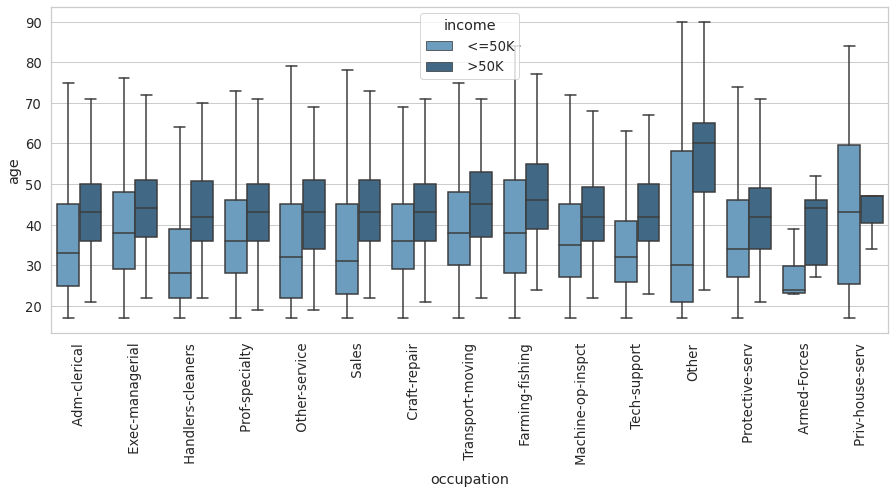

In [256]:
boxplot_variation('occupation','age', 'income',15)

If the person works at armed-forces and elder than 30, there's a 75% of chance to get a salary more than 50K.

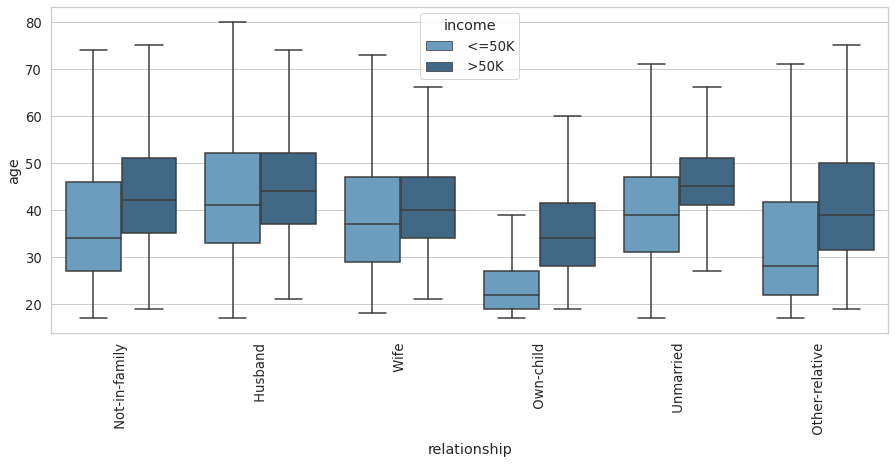

In [257]:
boxplot_variation('relationship','age', 'income',15)

There's no significance among the categories.

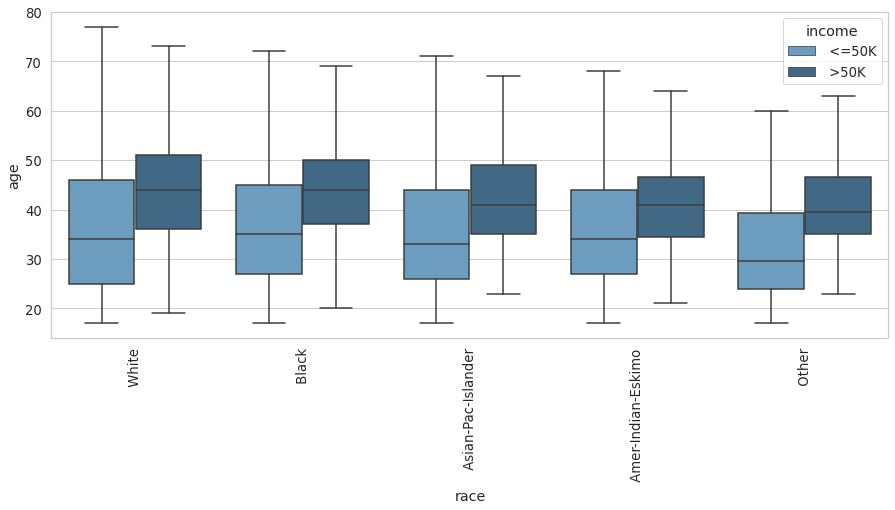

In [258]:
boxplot_variation('race','age', 'income',15)

There's no significance among the categories.

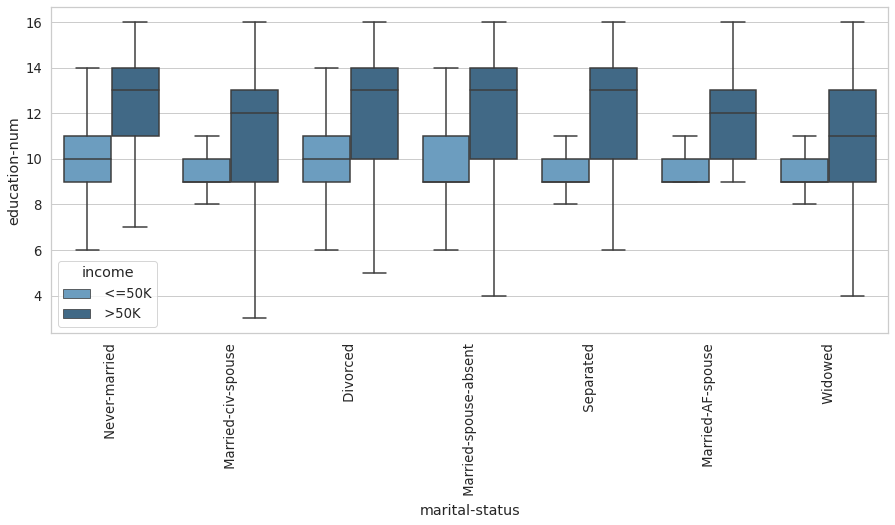

In [261]:
boxplot_variation('marital-status','education-num', 'income',15)

There's no significance among the categories.

##### Heatmap

No handles with labels found to put in legend.


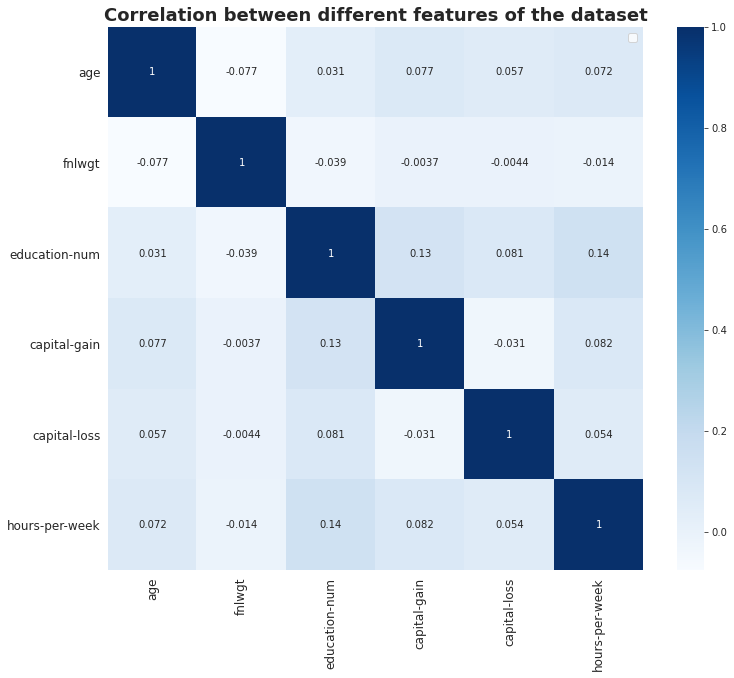

In [49]:
plt.figure(figsize = (12,10))
plt.title("Correlation between different features of the dataset", fontsize = 18, fontweight = 'bold')
sns.heatmap(df.corr(), cmap = 'Blues', annot = True)
plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=12, rotation = 0)
plt.legend(fontsize=12)
plt.show()

There is no significant correlation among any of the independent variables. So we can conclude there's no multi-collinearity in the dataset.

To test the correlation between independent and dependent variable, dependent variable is considerdered as a continuous variable only for the below correlation plot.  

In [91]:
#coverting the cts income dependent variable to 
df['income_cts']=df['income'].map({' <=50K': 0, ' >50K': 1})

In [92]:
df['income_cts'].value_counts()

0    37155
1    11687
Name: income_cts, dtype: int64

No handles with labels found to put in legend.


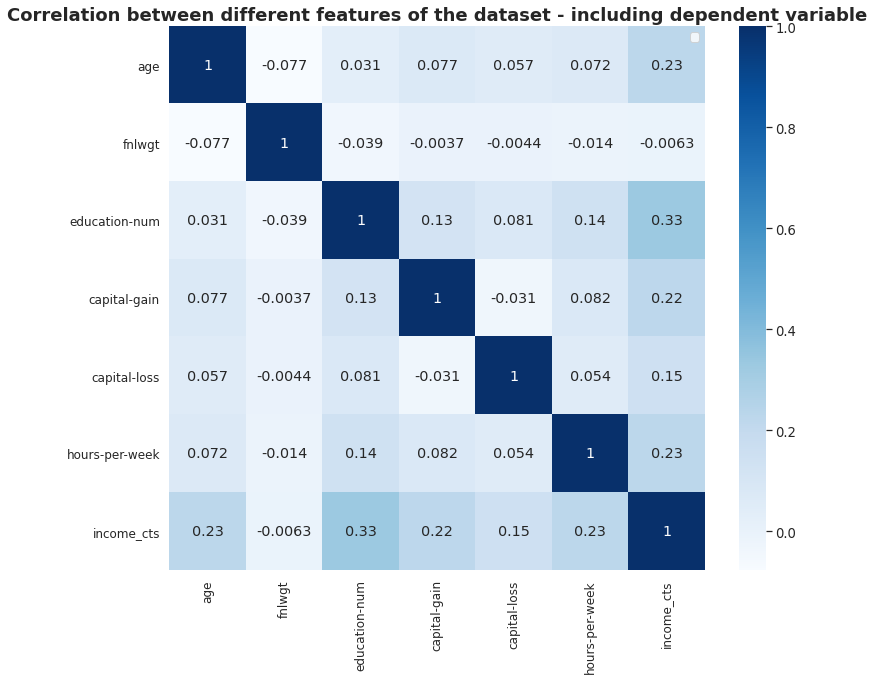

In [93]:
plt.figure(figsize = (12,10))
plt.title("Correlation between different features of the dataset - including dependent variable", fontsize = 18, fontweight = 'bold')
sns.heatmap(df.corr(), cmap = 'Blues', annot = True)
plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=12, rotation = 0)
plt.legend(fontsize=12)
plt.show()

In [ ]:
plt.figure(figsize=(15,7))
sns.swarmplot(x='sex', y='age', data=df, hue='income', dodge=True, palette='Blues_d')
plt.title("Age by income, Separated by sex")

In [ ]:
sns.catplot(x="race", y="age", hue="income",
            col="sex", aspect=.7,
            kind="swarm", data=df)